In [57]:
import psycopg2

con = psycopg2.connect(database="prato", user="postgres", password="1218", host="127.0.0.1", port="5432")

# 找出所有含有功能信息的POI
cur = con.cursor()
cur.execute("select * from function")
#cur.execute("select * from function where is_Chinese = True")
rows = cur.fetchall()

print("Database opened successfully")
print("Data Len = ", len(rows))
cur.close()
con.close()

Database opened successfully
Data Len =  23925


In [58]:
import numpy as np

bbox = [43.831, 11.0202, 43.9253, 11.1475]

pts = []
for row in rows:
    # print(row[1], row[2])
    if(row[1] < bbox[0] or row[1] > bbox[2] or row[2] < bbox[1] or row[2] > bbox[3]):
        continue
    pts.append([row[1], row[2]])

pts = np.array(pts)

In [59]:
from sklearn.preprocessing import StandardScaler
pts_s = StandardScaler().fit_transform(pts)

In [60]:
cnt = 0

ent looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x'

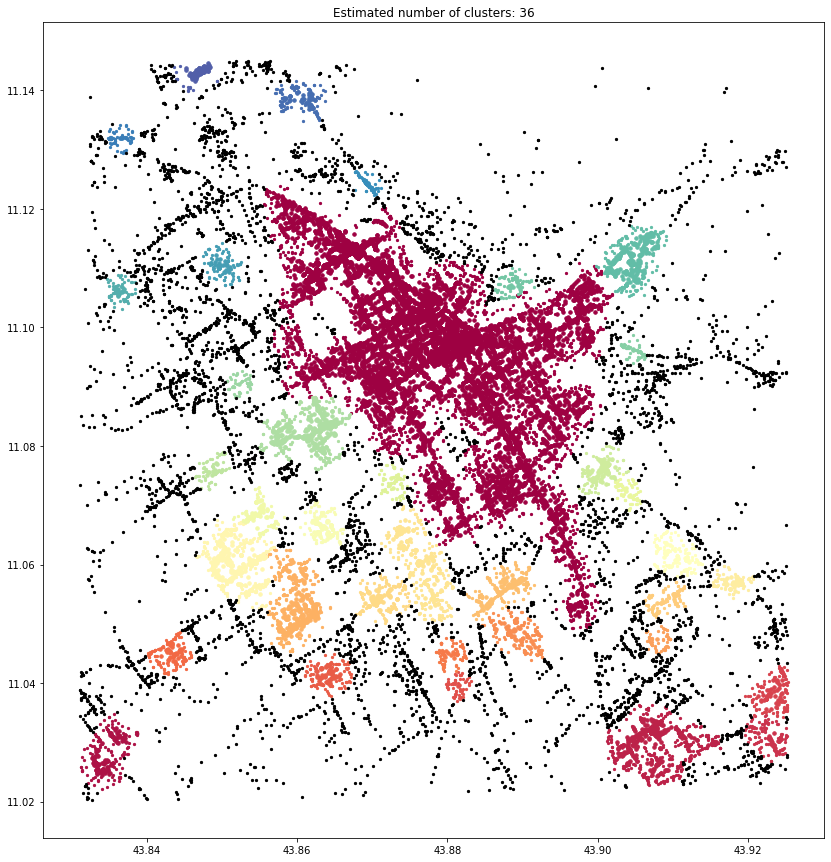

In [65]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn import metrics

eps = 0.1
min_sample = 60
db = DBSCAN(eps=0.09, min_samples=60).fit(pts_s)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)




fig = plt.figure(figsize=(14, 15))
ax = fig.add_subplot(111)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = pts[class_member_mask & core_samples_mask]
    ax.scatter(xy[:, 0], xy[:, 1],s=12, c=col)
    print("{\"")

    xy = pts[class_member_mask & ~core_samples_mask]
    ax.scatter(xy[:, 0], xy[:, 1],s=5, c=col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
print("fig/fig{}_{}.png".format(cnt, min_sample))
plt.savefig("./fig/fig{}_{}.png".format(cnt, min_sample))
cnt += 1
plt.show()


# plt.axis("equal")
# ax.scatter(pts[:, 0], pts[:, 1], c = y_pred)

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')

# print("fig/fig{}_{}.png".format(eps, min_sample))
# plt.savefig("./fig/fig{}_{}.png".format(eps, min_sample))
# cnt += 1
# plt.show()